<a href="https://colab.research.google.com/github/sagar9926/MTech_Atificial_Intelligence/blob/main/ML1/Fractal3_Assignment/ML_Problem_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torch import optim
from torch import nn
import matplotlib.pyplot as plt



import torchvision
import torchvision.transforms as transforms

In [3]:
BATCH_SIZE = 64

# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
transform = transforms.ToTensor()

# Load and transform data
trainset = torchvision.datasets.MNIST('/tmp', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST('/tmp', train=False, download=True, transform=transform)
valloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/MNIST/raw




Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/MNIST/raw




Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/MNIST/raw




Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Exploring The Data

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


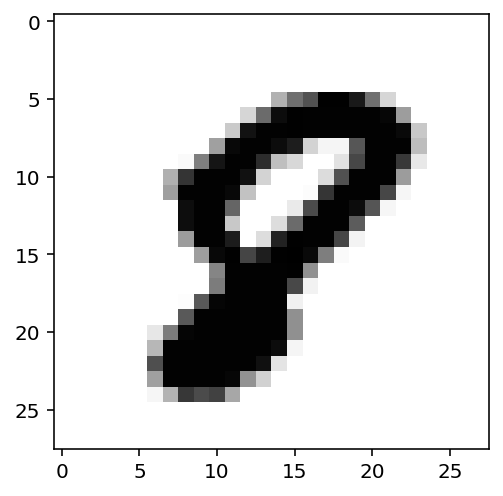

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

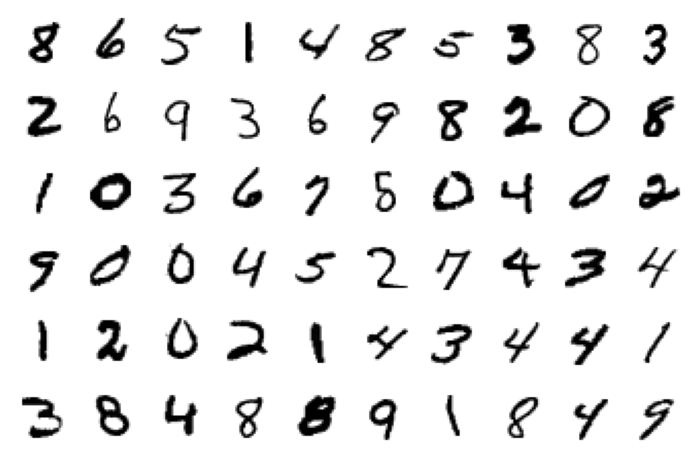

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
input_size = 784
output_size = 10
hidden_sizes = [128 , 64]
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [16]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
loss_plot_single = []

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
time0 = time()

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        loss_plot_single.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)
correct_count, all_count = 0, 0
#acc_plot_single = []
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Epoch 0 - Training loss: 0.30299806874841134
Epoch 1 - Training loss: 0.13136215727808062
Epoch 2 - Training loss: 0.09874479585502947
Epoch 3 - Training loss: 0.08391406367667445
Epoch 4 - Training loss: 0.06908159704896549
Epoch 5 - Training loss: 0.06288049269592572
Epoch 6 - Training loss: 0.05593112416759402
Epoch 7 - Training loss: 0.05603237053905054
Epoch 8 - Training loss: 0.04493521236239029
Epoch 9 - Training loss: 0.0517792213194005
Epoch 10 - Training loss: 0.04750479345889221
Epoch 11 - Training loss: 0.03930256746278621
Epoch 12 - Training loss: 0.043691493857095684
Epoch 13 - Training loss: 0.041428133483420206
Epoch 14 - Training loss: 0.04388532599551603

Training Time (in minutes) = 1.4278002858161927
Number Of Images Tested = 10000

Model Accuracy = 0.9705


## Changing Loss Function

In [17]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
loss_plot_single = []

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.MultiMarginLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
time0 = time()

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        # print(output.size())
        # print(labels.size())
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        loss_plot_single.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)
correct_count, all_count = 0, 0
#acc_plot_single = []
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Epoch 0 - Training loss: 0.05060991466513027
Epoch 1 - Training loss: 0.015374613504328798
Epoch 2 - Training loss: 0.010269201384613258
Epoch 3 - Training loss: 0.007618437709010059
Epoch 4 - Training loss: 0.005899210985097637
Epoch 5 - Training loss: 0.0048136429845551994
Epoch 6 - Training loss: 0.0036599855353595585
Epoch 7 - Training loss: 0.0029437650782769167
Epoch 8 - Training loss: 0.002566707250619873
Epoch 9 - Training loss: 0.0022011518596488726
Epoch 10 - Training loss: 0.0017493553856224732
Epoch 11 - Training loss: 0.001489089994021327
Epoch 12 - Training loss: 0.0013122413627387238
Epoch 13 - Training loss: 0.0010861201624639866
Epoch 14 - Training loss: 0.0008806411762202078

Training Time (in minutes) = 1.4363912383715312
Number Of Images Tested = 10000

Model Accuracy = 0.9781


## Experiments by changing number of hidden layers


In [18]:
learning_rates = [0.0001 , 0.001 , 0.003, 0.005,0.009 ,0.1,0.3,0.5,0.9,1 ,1]
input_size = 784
hidden_sizes = {"two_layer" : [128, 64] ,"three_layer" :  [128 ,128 ,64] ,"four_layer" : [128,128,128,64],"five_layer" :  [128,128,128,128,64],
                "six_layer" :  [128,128,128,128,128,64] , "seven_layer" :  [128,128,128,128,128,128,64],"eight_layer" :  [128,128,128,128,128,128,128,64],
                "nine_layer" :  [128,128,128,128,128,128,128,128,64],"ten_layer" :  [128,128,128,128,128,128,128,128,128,64]}
output_size = 10
loss_plot = {}
acc_plot = {}
for key,layers in hidden_sizes.items() :
  
  loss_plot_single = []

  # Build a feed-forward network
  model = []
  model.append(nn.Linear(input_size, layers[0]))
  model.append(nn.ReLU())
  for k in range(len(layers)- 1):
      model.append(nn.Linear(layers[k], layers[k+1]))
      model.append(nn.ReLU())
  model.append(nn.Linear(layers[-1], output_size))
  model.append(nn.LogSoftmax(dim=1))
  model = nn.Sequential(*model)
  print("##########################################")
  print(f" Number of hidden layers in model : {len(layers)}")
  print(" #################  Model Architecture ###############")
  print(model)
  print("##########################################")

  criterion = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
  time0 = time()
  epochs = 15
  for e in range(epochs):
      running_loss = 0
      for images, labels in trainloader:
          # Flatten MNIST images into a 784 long vector
          images = images.view(images.shape[0], -1)
      
          # Training pass
          optimizer.zero_grad()
          
          output = model(images)
          loss = criterion(output, labels)
          
          #This is where the model learns by backpropagating
          loss.backward()
          
          #And optimizes its weights here
          optimizer.step()
          
          running_loss += loss.item()
      else:
          loss_plot_single.append(running_loss/len(trainloader))
          print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
      loss_plot[key] = loss_plot_single
  print("\nTraining Time (in minutes) =",(time()-time0)/60)
  correct_count, all_count = 0, 0
  acc_plot_single = []
  for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print("Number Of Images Tested =", all_count)
  acc_plot[key] = (correct_count/all_count)*100
  print("\nModel Accuracy =", (correct_count/all_count))

##########################################
 Number of hidden layers in model : 2
 #################  Model Architecture ###############
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
##########################################
Epoch 0 - Training loss: 0.28839191928831565
Epoch 1 - Training loss: 0.12517571892464724
Epoch 2 - Training loss: 0.10093958949449776
Epoch 3 - Training loss: 0.0849881975087218
Epoch 4 - Training loss: 0.07252933523582437
Epoch 5 - Training loss: 0.06043172024766545
Epoch 6 - Training loss: 0.06159535332261818
Epoch 7 - Training loss: 0.05295781051778959
Epoch 8 - Training loss: 0.046853443181005004
Epoch 9 - Training loss: 0.04147666046069069
Epoch 10 - Training loss: 0.048482997065158476
Epoch 11 - Training loss: 0.04724044525441978
Epoch 12 - Training loss: 0.045165

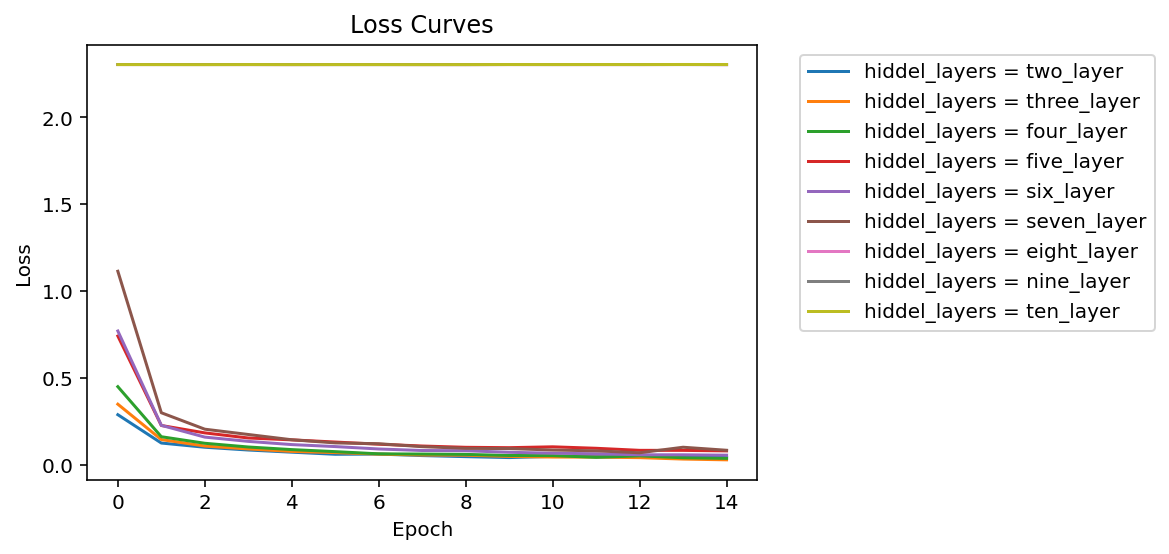

In [19]:
fig, ax = plt.subplots()

for  hl , loss in loss_plot.items():
  label = "hiddel_layers = " + hl
  ax.plot(loss,label=label)

  plt.title("Loss Curves")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  leg = ax.legend();
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


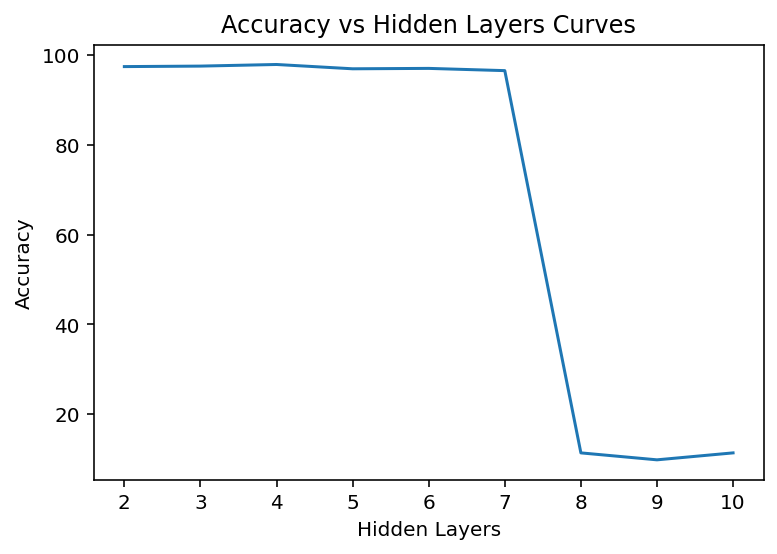

In [20]:
fig, ax = plt.subplots()

ax.plot( [2 ,3 ,4,5,6,7,8,9,10] , list(acc_plot.values()))

plt.title("Accuracy vs Hidden Layers Curves")
plt.xlabel("Hidden Layers")
plt.ylabel("Accuracy")
plt.show()


## Perform Grid Search to get best Learning rate

In [21]:
learning_rates = [0.0001 , 0.001 , 0.003, 0.005,0.009 ,0.1,0.3,0.5,0.9,1 ,1]
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
loss_plot = {}
acc_plot = {}
for lr in learning_rates :
  
  loss_plot_single = []

  # Build a feed-forward network
  model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], output_size),
                        nn.LogSoftmax(dim=1))
  criterion = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
  time0 = time()
  epochs = 15
  print("############################################")
  print(f" Training Model with Learning Rate = {lr} " )
  print("############################################")
  for e in range(epochs):
      running_loss = 0
      for images, labels in trainloader:
          # Flatten MNIST images into a 784 long vector
          images = images.view(images.shape[0], -1)
      
          # Training pass
          optimizer.zero_grad()
          
          output = model(images)
          loss = criterion(output, labels)
          
          #This is where the model learns by backpropagating
          loss.backward()
          
          #And optimizes its weights here
          optimizer.step()
          
          running_loss += loss.item()
      else:
          loss_plot_single.append(running_loss/len(trainloader))
          print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
      loss_plot[lr] = loss_plot_single
  print("\nTraining Time (in minutes) =",(time()-time0)/60)
  correct_count, all_count = 0, 0
  acc_plot_single = []
  for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print("Number Of Images Tested =", all_count)
  acc_plot[lr] = (correct_count/all_count)*100
  print("\nModel Accuracy =", (correct_count/all_count))

############################################
 Training Model with Learning Rate = 0.0001 
############################################
Epoch 0 - Training loss: 2.2953187885569104
Epoch 1 - Training loss: 2.273797485619974
Epoch 2 - Training loss: 2.2422746974013763
Epoch 3 - Training loss: 2.1892245113214197
Epoch 4 - Training loss: 2.1008955978635533
Epoch 5 - Training loss: 1.9636380389046821
Epoch 6 - Training loss: 1.7680245355756552
Epoch 7 - Training loss: 1.518130064137709
Epoch 8 - Training loss: 1.2609844041912794
Epoch 9 - Training loss: 1.0511522253693293
Epoch 10 - Training loss: 0.8963506693270669
Epoch 11 - Training loss: 0.7832778677630272
Epoch 12 - Training loss: 0.7001512083354027
Epoch 13 - Training loss: 0.638784471255884
Epoch 14 - Training loss: 0.5922039426021231

Training Time (in minutes) = 1.3679792722066244
Number Of Images Tested = 10000

Model Accuracy = 0.8507
############################################
 Training Model with Learning Rate = 0.001 
########

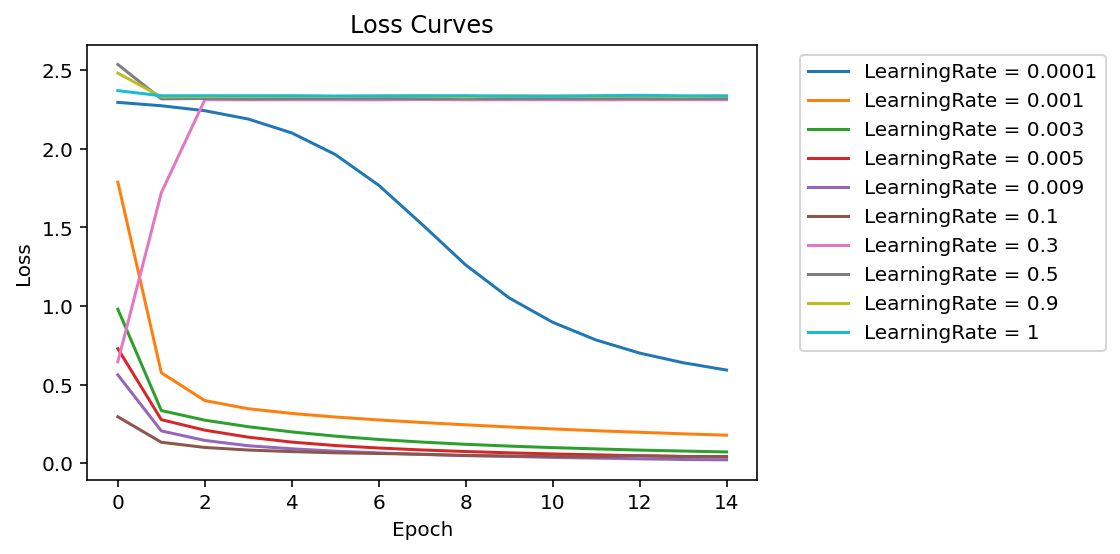

In [22]:
fig, ax = plt.subplots()

for lr , loss in loss_plot.items():
  label = "LearningRate = " + str(lr)
  ax.plot(loss,label=label)

  plt.title("Loss Curves")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  leg = ax.legend();
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


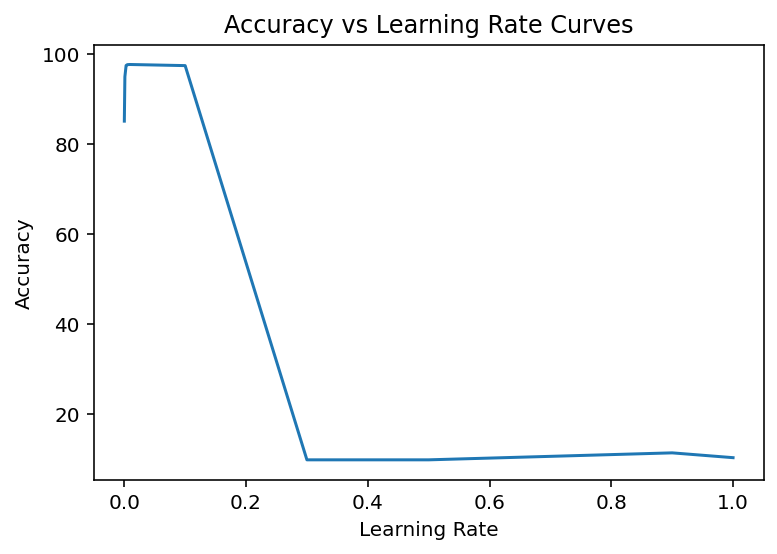

In [23]:
fig, ax = plt.subplots()

ax.plot( list(acc_plot.keys()) , list(acc_plot.values()))

plt.title("Accuracy vs Learning Rate Curves")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()
